In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("myopia.csv")
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


# Prepare the Data

In [3]:
#remove 'MYOPIC' column
df=df.drop(columns=["MYOPIC"])
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
#Scale the data by standardization
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

# Dimensionality Reduction

In [6]:
# Apply PCA with a desired variance of 90%
pca = PCA(n_components=.9)
pca_data=pca.fit_transform(df_scaled)
print(f"Explained variance is: {pca.explained_variance_ratio_.sum()}")
print(f"shape is: {pca_data.shape}")

Explained variance is: 0.9187361702915186
shape is: (618, 10)


In [8]:
# apply t-SNE to pca_data
tsne = TSNE(learning_rate=35, perplexity = 50)
tsne_features = tsne.fit_transform(pca_data)
print(f"shape is: {tsne_features.shape}")

C:\Users\mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


shape is: (618, 2)


In [19]:
# Prepare to plot the dataset
df_tsne=pd.DataFrame({"x":tsne_features[:,0],
                     "y":tsne_features[:,1]
})

df_tsne

,x,y
0,4.547953,-10.708971
1,13.409910,-5.895145
2,-12.014467,1.214039
3,-0.066125,6.768737
4,3.478072,-5.494343
...,...,...
613,2.004094,-13.166879
614,13.225007,-5.449246
615,13.636310,-4.250738
616,-10.494745,-3.756386


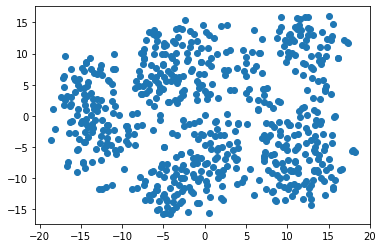

In [20]:
# Visualize the clusters
plt.scatter(df_tsne['x'], df_tsne['y'])
plt.show()

#  Perform a Cluster Analysis with K-means

C:\Users\mohamed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


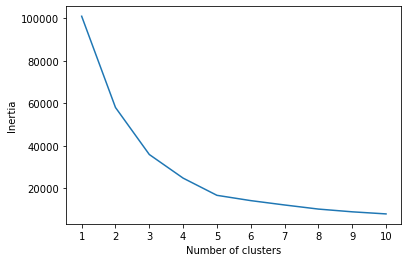

In [21]:
# create K-means model and find the best value of K
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Seems like the best value of K is 6

In [22]:
# Initializing model with K = 5
model = KMeans(n_clusters=5, random_state=0)
# fit the dataset
model.fit(df_tsne)
# Get predictions
predictions = model.predict(df_tsne)
predictions

array([0, 3, 4, 2, 0, 2, 2, 4, 4, 4, 1, 3, 4, 4, 0, 4, 4, 0, 1, 4, 2, 2,
       2, 2, 2, 4, 3, 0, 3, 0, 0, 1, 3, 2, 0, 2, 1, 2, 2, 2, 3, 4, 1, 3,
       0, 2, 1, 2, 0, 3, 3, 2, 2, 0, 2, 2, 3, 3, 2, 2, 2, 0, 4, 2, 1, 0,
       4, 2, 4, 4, 3, 1, 1, 1, 2, 0, 4, 1, 2, 4, 3, 2, 0, 0, 2, 3, 0, 1,
       0, 3, 4, 4, 3, 2, 2, 0, 2, 3, 0, 0, 1, 4, 2, 4, 0, 2, 4, 4, 3, 2,
       1, 2, 1, 3, 3, 3, 4, 2, 3, 2, 3, 4, 3, 4, 1, 0, 4, 0, 3, 0, 0, 2,
       2, 4, 3, 2, 4, 0, 4, 2, 0, 2, 3, 2, 3, 3, 2, 1, 0, 1, 0, 4, 1, 3,
       4, 4, 0, 3, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 4, 3, 3, 1, 4, 0, 2,
       0, 3, 0, 0, 2, 1, 4, 0, 4, 1, 0, 3, 2, 3, 3, 0, 3, 2, 3, 2, 4, 2,
       3, 0, 0, 0, 2, 4, 4, 3, 0, 2, 3, 3, 1, 0, 3, 3, 0, 0, 1, 2, 2, 0,
       3, 2, 2, 4, 4, 2, 1, 1, 4, 2, 1, 2, 0, 1, 0, 3, 3, 4, 4, 4, 1, 0,
       4, 2, 0, 2, 0, 0, 1, 2, 0, 1, 3, 1, 0, 0, 0, 0, 3, 2, 1, 4, 0, 3,
       3, 4, 3, 3, 4, 2, 2, 4, 4, 1, 2, 0, 2, 0, 1, 0, 3, 1, 3, 1, 3, 0,
       4, 0, 2, 4, 4, 2, 0, 4, 1, 4, 4, 2, 2, 2, 4,

In [23]:
#add new "class" columns
df_tsne["class"]= predictions
df_tsne

,x,y,class
0,4.547953,-10.708971,0
1,13.409910,-5.895145,3
2,-12.014467,1.214039,4
3,-0.066125,6.768737,2
4,3.478072,-5.494343,0
...,...,...,...
613,2.004094,-13.166879,0
614,13.225007,-5.449246,3
615,13.636310,-4.250738,3
616,-10.494745,-3.756386,4


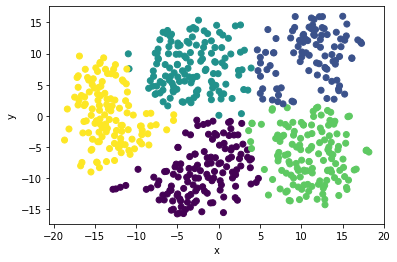

In [24]:
plt.scatter(x=df_tsne["x"], y=df_tsne["y"], c=df_tsne['class'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Findings

After the reduction of the data and based on the results of K-means, the patients can be classified to 5 groups.